In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

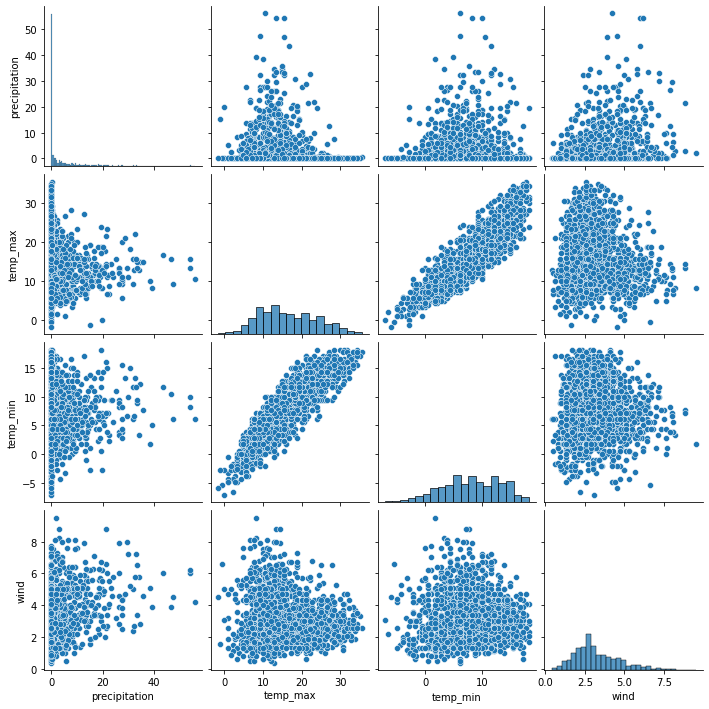

In [9]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

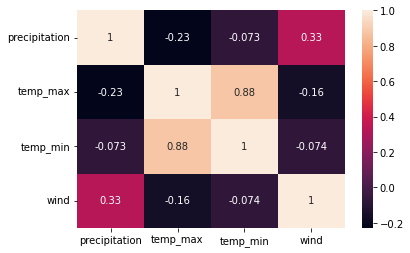

In [10]:
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:xlabel='weather', ylabel='count'>

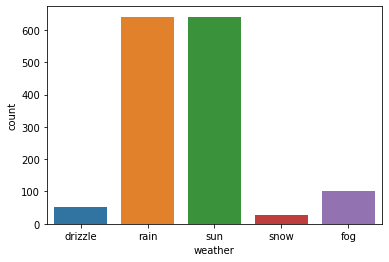

In [11]:
sns.countplot(data=df, x='weather')

In [12]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [13]:
df['weather']=lr.fit_transform(df['weather'])
df['date']=lr.fit_transform(df['date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   int32  
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 57.2 KB


In [15]:
x=df.iloc[:,:-1]
y=df['weather']

In [16]:
x

,date,precipitation,temp_max,temp_min,wind
0,0,0.0,12.8,5.0,4.7
1,1,10.9,10.6,2.8,4.5
2,2,0.8,11.7,7.2,2.3
3,3,20.3,12.2,5.6,4.7
4,4,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,1456,8.6,4.4,1.7,2.9
1457,1457,1.5,5.0,1.7,1.3
1458,1458,0.0,7.2,0.6,2.6
1459,1459,0.0,5.6,-1.0,3.4


In [17]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [20]:
lr = LogisticRegression(solver = 'liblinear')
dt = DecisionTreeClassifier(max_depth = 5)
sv = SVC()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [21]:
def model(s):
    s.fit(xtrain,ytrain)
    ypred = s.predict(xtest)
    print(classification_report(ytest,ypred))

In [22]:
model(lr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        35
           2       0.89      0.90      0.89       189
           3       0.00      0.00      0.00         8
           4       0.75      0.95      0.84       193

    accuracy                           0.80       439
   macro avg       0.33      0.37      0.35       439
weighted avg       0.71      0.80      0.75       439



In [23]:
model(dt)

              precision    recall  f1-score   support

           0       0.75      0.21      0.33        14
           1       0.59      0.29      0.38        35
           2       0.91      0.94      0.93       189
           3       0.50      0.25      0.33         8
           4       0.81      0.92      0.86       193

    accuracy                           0.84       439
   macro avg       0.71      0.52      0.57       439
weighted avg       0.83      0.84      0.82       439



In [24]:
model(sv)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        35
           2       0.50      0.56      0.53       189
           3       0.00      0.00      0.00         8
           4       0.50      0.59      0.54       193

    accuracy                           0.50       439
   macro avg       0.20      0.23      0.21       439
weighted avg       0.43      0.50      0.46       439



In [25]:
model(kn)

              precision    recall  f1-score   support

           0       0.36      0.36      0.36        14
           1       0.36      0.26      0.30        35
           2       0.71      0.67      0.69       189
           3       0.00      0.00      0.00         8
           4       0.67      0.76      0.71       193

    accuracy                           0.65       439
   macro avg       0.42      0.41      0.41       439
weighted avg       0.64      0.65      0.64       439



In [26]:
model(rf)

              precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.58      0.20      0.30        35
           2       0.95      0.95      0.95       189
           3       1.00      0.12      0.22         8
           4       0.80      0.96      0.87       193

    accuracy                           0.86       439
   macro avg       0.83      0.50      0.55       439
weighted avg       0.85      0.86      0.83       439

